In [ ]:
### BEGIN ASSIGNMENT

# UC Berkeley Capstone by Kelly Lieu
Cohort: October 2024<br/>
Date of Assignment: May 2025

## Background <br/>
My goal is for this capstone is for me to learn and practice how to apply AI/ML principles with
storytelling data visualization techniques. It was important to me to choose a dataset that was easy to obtain and a topic that I can learn from to apply at home or at work.The data comes from Kaggle called, "Longevity Factors." We will explore:

*  Which factors provide the most gain in years of life?
*  Which factors provide the most gain in years of life for females?
*  What are the top features based on the weighted impact of strength of science on years?
*  How do the stronger science features rank against the suggestive features?
* What other insights can I derive from the data?

## Table of Contents
1.   Exploratory Data Analysis (EAD)
2.   Initial Report and Findings from EAD
3.   Secondary EAD
4.   Secondary Report and Findings
5.   Feature Engineering



## Exploratory Data Analysis (EAD)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# mount GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# read data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KellyLieu_AI-ML_Project/Longevity/data/LiveLongerData.csv')

In [37]:
df.head()

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect,Comment,Note,ID,Sources,Links
0,Smoking,-10.0,strong,3,Both,negative,10 years gained (against those who continue to...,14 if combined with exercise and eating health...,1,"Khaw KT, et al. (2008). Combined impact of hea...",http://www.washingtonpost.com/wp-dyn/articles/...
1,Sitting Down,-3.0,suggestive,1,Both,negative,for 8-11 hours sitting a day,"No matter how much you exercise, sitting too m...",2,Sydney School of Public Health research paper ...,http://www.ncbi.nlm.nih.gov/pubmed/22450936
2,Too much sleeping,-1.5,suggestive,1,Both,negative,"7 hours ideal, no more than 8 hrs a night",Averaging more than 8 hours sleep a night will...,3,New Scientist,http://www.newscientist.com/article/dn1928-sev...
3,More Optimism,2.0,suggestive,1,Female,positive,& faith in fellow humans. calc takes average %...,Women within the highest 25% of optimism score...,4,"Source: Hilary A. Tindle, M.D., assistant prof...",www.nlm.nih.gov/medlineplus/news/fullstory_879...
4,More Pets,3.0,good,2,Both,positive,particularly for elderly. calc assumes that he...,(1) Cats - According to a study by the Minneso...,5,Medical News Today; National Center for Biotec...,http://www.medicalnewstoday.com/articles/98432...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Factor                           35 non-null     object 
 1   Years gained / lost              35 non-null     float64
 2   strength of science?             35 non-null     object 
 3   strength of science as a number  35 non-null     int64  
 4   sexes affected                   35 non-null     object 
 5   effect                           35 non-null     object 
 6   Comment                          26 non-null     object 
 7   Note                             35 non-null     object 
 8   ID                               35 non-null     int64  
 9   Sources                          35 non-null     object 
 10  Links                            35 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.1+ KB


In [6]:
df.describe()

,Years gained / lost,strength of science as a number,ID
count,35.000000,35.000000,35.000000
mean,3.243143,1.771429,18.000000
std,8.126155,0.877353,10.246951
min,-25.000000,1.000000,1.000000
25%,1.070000,1.000000,9.500000
50%,3.500000,1.000000,18.000000
75%,7.750000,3.000000,26.500000
max,15.000000,3.000000,35.000000



Missing Values:
Factor                             0
Years gained / lost                0
strength of science?               0
strength of science as a number    0
sexes affected                     0
effect                             0
Comment                            9
Note                               0
ID                                 0
Sources                            0
Links                              0
dtype: int64


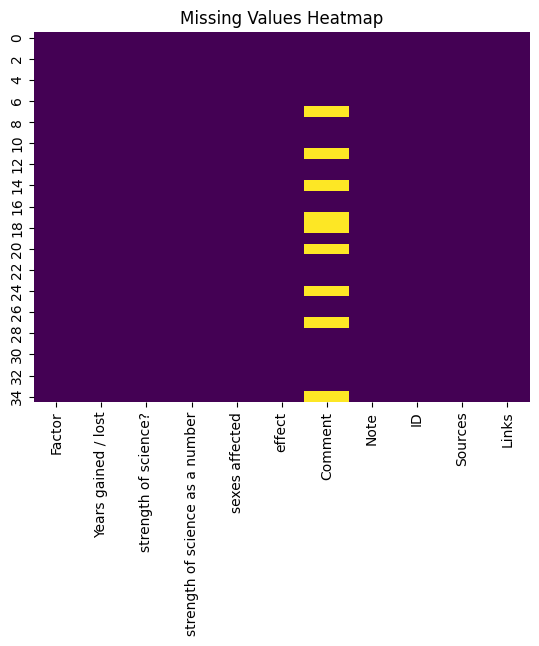

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [38]:
# Drop irrelevant and columns with missing values
df_cleaned = df.drop(columns=['Comment', 'Note', 'Sources', 'Links', 'ID'], axis=1)

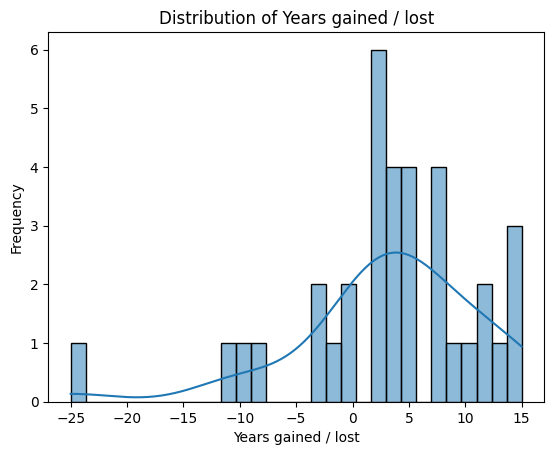

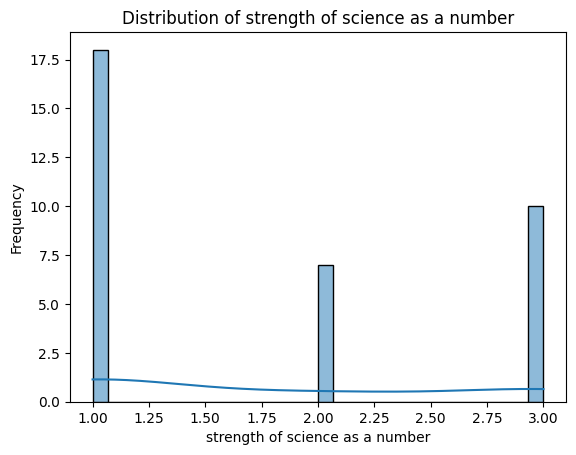

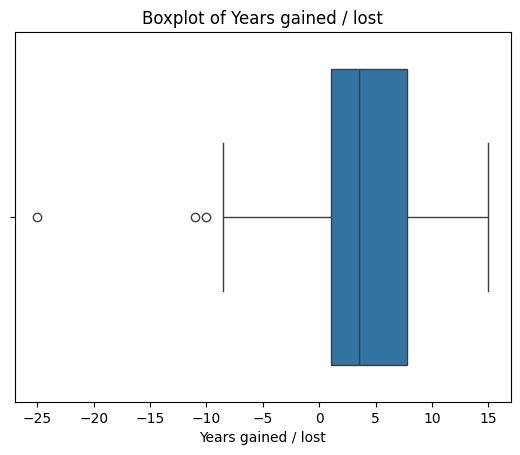

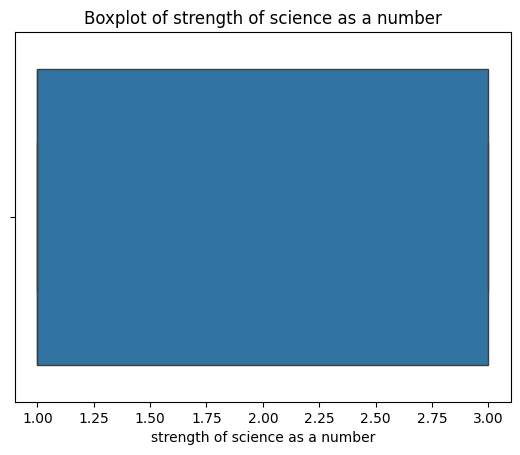

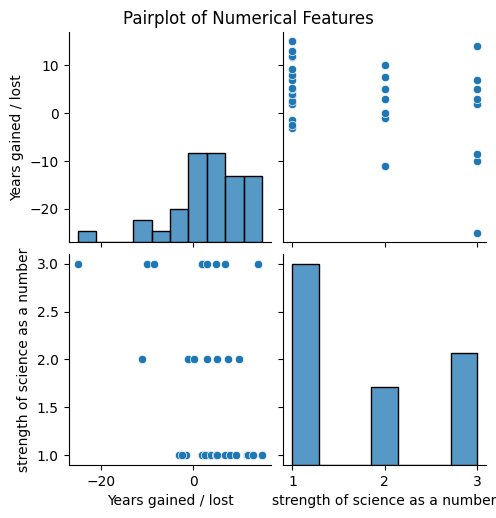

In [78]:
# Distribution plots for numerical features
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    plt.figure()
    sns.histplot(df_cleaned[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots to identify outliers
for feature in numerical_features:
    plt.figure()
    sns.boxplot(x=df_cleaned[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df_cleaned[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [81]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Factor                           35 non-null     object 
 1   Years gained / lost              35 non-null     float64
 2   strength of science?             35 non-null     object 
 3   strength of science as a number  35 non-null     int64  
 4   sexes affected                   35 non-null     object 
 5   effect                           35 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ KB


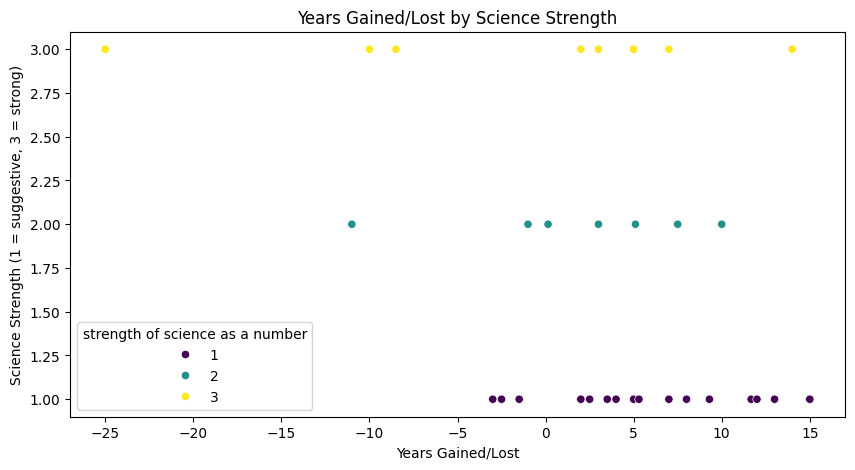

In [86]:
# Scatterplot to visualize relationship between science and years
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Years gained / lost', y='strength of science as a number', data=df_cleaned, hue='strength of science as a number', palette='viridis')
plt.title("Years Gained/Lost by Science Strength")
plt.xlabel("Years Gained/Lost")
plt.ylabel("Science Strength (1 = suggestive, 3 = strong)")
plt.show()

### Initial Report and Findings from EAD<br/>


*   Imported necessary libraries and loaded the dataset for preview.
*   Checked for missing values and visualized them using a heatmap; the comments column had the highest number of nulls.
*   Dropped irrelevant columns including comment, note, sources, links, and id.
*   Focused on numerical columns to analyze distributions via histograms. Most values for years gained/lost fell between 2–6 years, with a few negative outliers (e.g., -25 and -10 years).
*   Observed that most contributing factors had low scientific strength.
*   Used boxplots to identify outliers. The science column was not informative due to its limited categorical values (1, 2, 3).
*   Pairplot analysis was limited by the presence of only two numerical features and revealed no significant correlations.
*   Used scatter plot visualize relationship between strength of science and years gained. I observed that the factors with strength of science is evenly distributed, which is not indicative of anything to hypothesize between these two features at this point.

## Secondary EAD

In [150]:
# Create a copy of cleaned df
df_fe = df_cleaned.copy()

In [151]:
df_fe.head()

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect
0,Smoking,-10.0,strong,3,Both,negative
1,Sitting Down,-3.0,suggestive,1,Both,negative
2,Too much sleeping,-1.5,suggestive,1,Both,negative
3,More Optimism,2.0,suggestive,1,Female,positive
4,More Pets,3.0,good,2,Both,positive


In [152]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Factor                           35 non-null     object 
 1   Years gained / lost              35 non-null     float64
 2   strength of science?             35 non-null     object 
 3   strength of science as a number  35 non-null     int64  
 4   sexes affected                   35 non-null     object 
 5   effect                           35 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ KB


In [170]:
# Calculate weighted impact of each factor
df_fe['weighted_impact'] = df_fe['Years gained / lost'] * df_fe['strength of science as a number']

top_weighted = df_fe.sort_values(by='weighted_impact', ascending=False)[['Factor', 'weighted_impact']].head(15)
top_negative = df_fe.sort_values(by='weighted_impact')[['Factor', 'weighted_impact']].head(10)

<ipython-input-171-4e08c0179f00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_weighted, x='weighted_impact', y='Factor', palette='Greens_r')


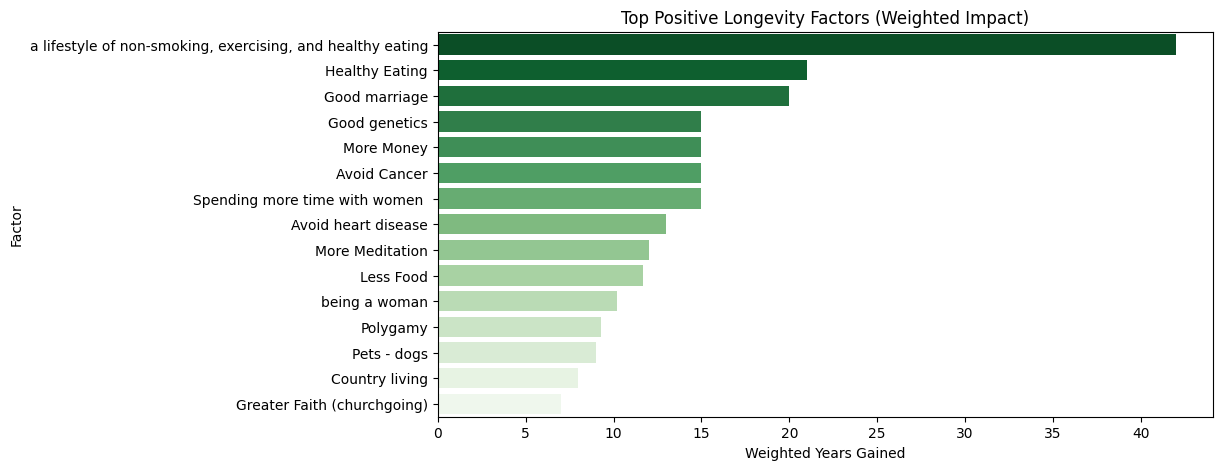

In [171]:
# Boxplot to visualize Top weighted factors
plt.figure(figsize=(10, 5))
sns.barplot(data=top_weighted, x='weighted_impact', y='Factor', palette='Greens_r')
plt.title("Top Positive Longevity Factors (Weighted Impact)")
plt.xlabel("Weighted Years Gained")
plt.ylabel("Factor")
plt.show()

<ipython-input-155-3aacfa203ebe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative, x='weighted_impact', y='Factor', palette='Reds')


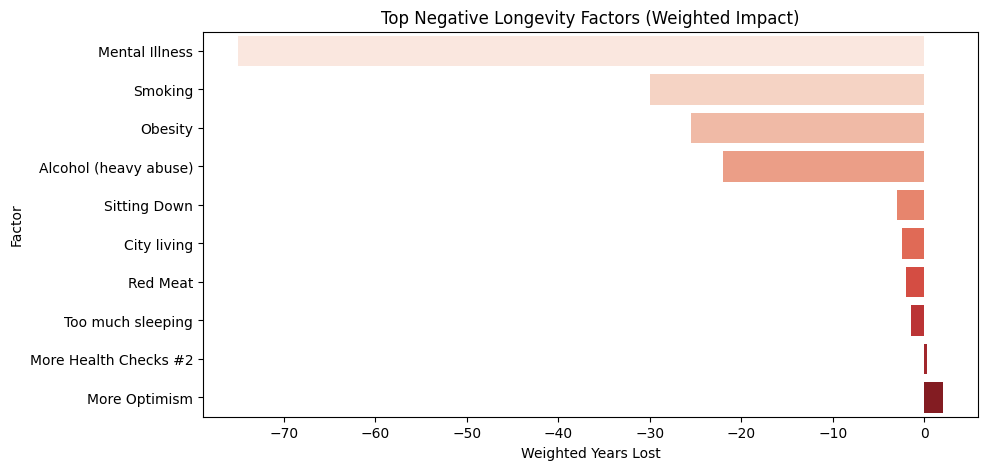

In [155]:
# Boxplot to visualize Lowest weighted factors
plt.figure(figsize=(10, 5))
sns.barplot(data=top_negative, x='weighted_impact', y='Factor', palette='Reds')
plt.title("Top Negative Longevity Factors (Weighted Impact)")
plt.xlabel("Weighted Years Lost")
plt.ylabel("Factor")
plt.show()

In [172]:
df_wm = df_fe.copy()

In [164]:
# Create dataset focused on factors for women
# Normalize 'sexes affected' values to lowercase for consistency
df_wm["sexes affected"] = df_fe["sexes affected"].str.lower()
# Replace values 'both' and similar with 'women'
df_wm["sexes affected"] = df_fe["sexes affected"].replace({
    "both": "Female",
    "both but especially for women": "Female",
    "both, but esp. for men": "Male"})

In [159]:
df_wm.head()

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect,weighted_impact
0,Smoking,-10.0,strong,3,Female,negative,-30.0
1,Sitting Down,-3.0,suggestive,1,Female,negative,-3.0
2,Too much sleeping,-1.5,suggestive,1,Female,negative,-1.5
4,More Pets,3.0,good,2,Female,positive,6.0
6,Healthy Eating,7.0,strong,3,Female,positive,21.0


In [165]:
# Calculate weighted impact of each factor for women
df_wm['weighted_impact'] = df_wm['Years gained / lost'] * df_wm['strength of science as a number']

top_weighted_w = df_wm.sort_values(by='weighted_impact', ascending=False)[['Factor', 'weighted_impact']].head(10)
top_negative_w = df_wm.sort_values(by='weighted_impact')[['Factor', 'weighted_impact']].head(10)

<ipython-input-166-2e0d5c05a0e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=top_weighted, x='weighted_impact', y='Factor', palette='Greens_r')
<ipython-input-166-2e0d5c05a0e5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=top_weighted_w, x='weighted_impact', y='Factor', palette='Greens_r')


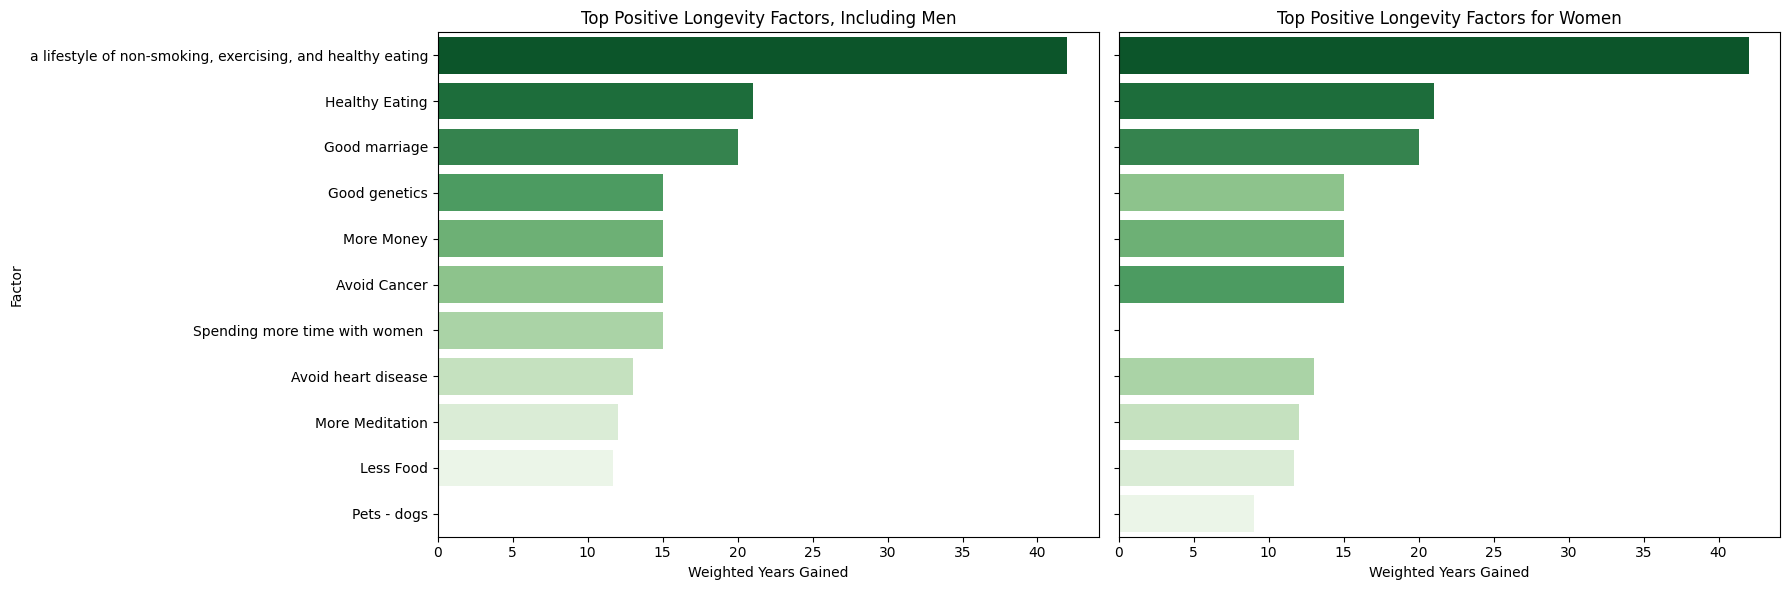

In [166]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Barplot Including Men
sns.barplot(ax=axes[0], data=top_weighted, x='weighted_impact', y='Factor', palette='Greens_r')
axes[0].set_title("Top Positive Longevity Factors, Including Men")
axes[0].set_xlabel("Weighted Years Gained")
axes[0].set_ylabel("Factor")

# Barplot for Women
sns.barplot(ax=axes[1], data=top_weighted_w, x='weighted_impact', y='Factor', palette='Greens_r')
axes[1].set_title("Top Positive Longevity Factors for Women")
axes[1].set_xlabel("Weighted Years Gained")
axes[1].set_ylabel("")  # Remove y-axis label to reduce clutter

# Improve layout
plt.tight_layout()
plt.show()

<ipython-input-168-84c4e84e2e64>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=top_negative, x='weighted_impact', y='Factor', palette='Reds')
<ipython-input-168-84c4e84e2e64>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=top_negative_w, x='weighted_impact', y='Factor', palette='Reds')


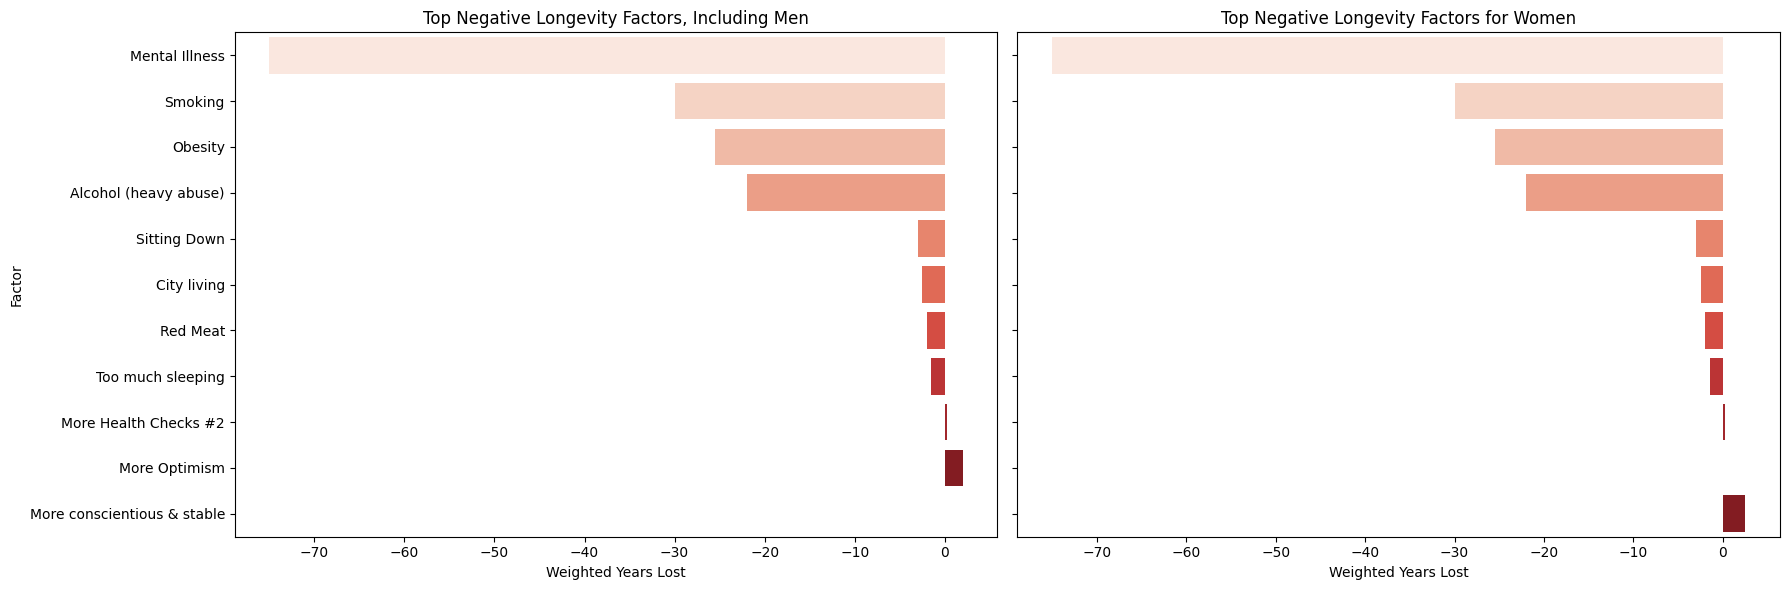

In [168]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Barplot Including Men
sns.barplot(ax=axes[0], data=top_negative, x='weighted_impact', y='Factor', palette='Reds')
axes[0].set_title("Top Negative Longevity Factors, Including Men")
axes[0].set_xlabel("Weighted Years Lost")
axes[0].set_ylabel("Factor")

# Barplot for Women
sns.barplot(ax=axes[1], data=top_negative_w, x='weighted_impact', y='Factor', palette='Reds')
axes[1].set_title("Top Negative Longevity Factors for Women")
axes[1].set_xlabel("Weighted Years Lost")
axes[1].set_ylabel("")  # Remove y-axis label to reduce clutter

# Improve layout
plt.tight_layout()
plt.show()

### Secondary Report and Findings from Further Analysis

Since the Initial EAD was inconclusive, I proceeded with further investigating whether the factors impacting lifestyle were impacted by strength of science and furthermore comparing the factors between genders. First, I computed the weighted impact of each factor by multiplying years gained/lost feature with strength of science as a number (1, 2, or 3). Immediately, it provided a better sense of magnitude and importance of each factor, with science-driven as a better indicator that the factor was more reliable although knowing that the actual years gained/lost in life is no longer accurate.

## Feature Engineering

The next sequence of steps is to perform feature engineering to prepare my dataset for building a model. Below I will start with a copy of the previous dataframe and perform the following:
*   Identify categorical variables
*   Use one-hot encoder on categorical features
*   Create interaction terms (multiply factor and strength of science)
*   Create polynomial features and create a dataframe (except target col)
*   Create combined original dataframe with polynomial dataframe
*   Use StandardScaler to scale all my features (except target col)
*   Add back target column and I am ready to build my model


In [173]:
# Create a copy of cleaned df
df_fe = df_cleaned.copy()

In [174]:
# Handle categorical variables
# Check for object or category type columns
categorical_cols = df_fe.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Factor', 'strength of science?', 'sexes affected', 'effect']


In [175]:
# One-hot encode categorical features
df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

In [176]:
# Create interaction terms (multiplying influential features)
# For interaction between Factor and strength of science
if 'Factor' in df_fe.columns and 'strength of science?' in df_fe.columns:
    df_fe['Factor_science_Interaction'] = df_fe['Factor'] * df_fe['strength of science as a number']

In [177]:
# Create polynomial features for numeric variables
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [178]:
# Avoid generating polynomial features for the target column
target_column = 'Years gained / lost '
if target_column in numerical_cols:
    numerical_cols.remove(target_column)

In [179]:
poly_features = poly.fit_transform(df_fe[numerical_cols])
poly_feature_names = poly.get_feature_names_out(numerical_cols)

# Create DataFrame for polynomial features
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate with original dataframe (excluding the original numerical cols used for poly features)
df_fe = df_fe.drop(columns=numerical_cols).reset_index(drop=True)
df_fe = pd.concat([df_fe.reset_index(drop=True), df_poly.reset_index(drop=True)], axis=1)

In [180]:
# Normalize/scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_fe)
df_scaled = pd.DataFrame(scaled_features, columns=df_fe.columns)

In [182]:
df_scaled

,Factor_A little exercise,Factor_A little wine,Factor_Alcohol (heavy abuse),Factor_Avoid Cancer,Factor_Avoid heart disease,Factor_City living,Factor_Country living,Factor_Good genetics,Factor_Good marriage,Factor_Greater Faith (churchgoing),...,"sexes affected_Both, but esp. for men",sexes affected_Female,sexes affected_Male,sexes affected_male,effect_positive,Years gained / lost,strength of science as a number,Years gained / lost^2,Years gained / lost strength of science as a number,strength of science as a number^2
0,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,-2.783882,-1.653486,1.420760,0.219572,-1.796917,1.491460
1,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,-2.783882,-0.779494,-0.892105,-0.569122,-0.333365,-0.841550
2,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,-2.783882,-0.592210,-0.892105,-0.627624,-0.252056,-0.841550
3,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,4.062019,-0.408248,-0.171499,0.359211,-0.155214,-0.892105,-0.612457,-0.062336,-0.841550
4,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,0.359211,-0.030358,0.264327,-0.569122,0.154486,0.033329
5,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,2.449490,-0.171499,0.359211,0.032070,-0.892105,-0.540954,0.018972,-0.841550
6,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,0.359211,0.469066,1.420760,-0.222443,0.967571,1.491460
7,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,0.359211,-0.529782,0.264327,-0.638458,-0.279159,0.033329
8,-0.171499,-0.171499,5.830952,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,0.359211,-1.778342,0.264327,0.401578,-1.363272,0.033329
9,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,5.830952,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,0.359211,-0.717066,-0.892105,-0.592956,-0.306262,-0.841550


In [183]:
# Add back the target column
# Correct the target column name by removing the trailing space
target_column = 'Years gained / lost'

df_scaled[target_column] = df_fe[target_column].values

print("Feature engineered dataset shape:", df_scaled.shape)
df_scaled.head()

Feature engineered dataset shape: (35, 47)


,Factor_A little exercise,Factor_A little wine,Factor_Alcohol (heavy abuse),Factor_Avoid Cancer,Factor_Avoid heart disease,Factor_City living,Factor_Country living,Factor_Good genetics,Factor_Good marriage,Factor_Greater Faith (churchgoing),...,"sexes affected_Both, but esp. for men",sexes affected_Female,sexes affected_Male,sexes affected_male,effect_positive,Years gained / lost,strength of science as a number,Years gained / lost^2,Years gained / lost strength of science as a number,strength of science as a number^2
0,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,-2.783882,-10.0,1.420760,0.219572,-1.796917,1.491460
1,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,-2.783882,-3.0,-0.892105,-0.569122,-0.333365,-0.841550
2,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,-2.783882,-1.5,-0.892105,-0.627624,-0.252056,-0.841550
3,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,4.062019,-0.408248,-0.171499,0.359211,2.0,-0.892105,-0.612457,-0.062336,-0.841550
4,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.246183,-0.408248,-0.171499,0.359211,3.0,0.264327,-0.569122,0.154486,0.033329


In [ ]:
### END OF ASSIGNMENT